In [2]:
%pip install scikit-surprise


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from matplotlib import pyplot as plt

In [4]:
read = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1, rating_scale=(1, 5))
ratings_data = Dataset.load_from_file("data/ratings_small.csv",read)

#### c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation

#### Probabilistic Matrix Factorization 

In [5]:
svd_algo = SVD(biased = False)
PMF_result = cross_validate(svd_algo, ratings_data, measures=['RMSE', 'MAE'],cv=5,verbose = True)
PMF_results_df = pd.DataFrame.from_dict(PMF_result)

print("Average PMF RMSE value", PMF_results_df['test_rmse'].mean())
print("Average PMF MAE value", PMF_results_df['test_mae'].mean())

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0012  1.0163  1.0034  1.0099  1.0091  1.0080  0.0053  
MAE (testset)     0.7735  0.7864  0.7743  0.7774  0.7792  0.7782  0.0046  
Fit time          0.91    0.85    0.90    0.93    0.93    0.90    0.03    
Test time         0.17    0.21    0.13    0.21    0.13    0.17    0.04    
Average PMF RMSE value 1.0079937541322432
Average PMF MAE value 0.7781778395624042


#### User based Collaborative Filtering

In [6]:
sim_options = {'user_based': True }
user_based = KNNBasic(sim_options=sim_options)
user_based_results = cross_validate(user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)

user_based_results_df = pd.DataFrame.from_dict(user_based_results)
print("Average User Based RMSE value", user_based_results_df['test_rmse'].mean())
print("Average User Based MAE value", user_based_results_df['test_mae'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9686  0.9597  0.9659  0.9742  0.9691  0.9675  0.0047  
MAE (testset)     0.7437  0.7393  0.7431  0.7468  0.7478  0.7441  0.0030  
Fit time          0.09    0.11    0.12    0.10    0.11    0.11    0.01    
Test time         1.53    1.40    1.51    1.34    1.53    1.46    0.08    
Average User Based RMSE value 0.9675066770042428
Average User Based MAE value 0.744146929571477


#### Item based Collaborative Filtering

In [7]:
sim_options = {'user_based': False }
item_based = KNNBasic(sim_options=sim_options)
item_based_results = cross_validate(item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
item_based_results_df = pd.DataFrame.from_dict(item_based_results)
print("Average Item Based RMSE value", item_based_results_df['test_rmse'].mean())
print("Average Item Based MAE value", item_based_results_df['test_mae'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9335  0.9359  0.9325  0.9373  0.9363  0.9351  0.0018  
MAE (testset)     0.7219  0.7227  0.7196  0.7239  0.7202  0.7217  0.0016  
Fit time          3.09    2.85    2.59    2.57    2.58    2.73    0.21    
Test time         5.66    6.11    5.64    6.00    5.73    5.83    0.19    
Average Item Based RMSE value 0.9351043110598732
Average Item Based MAE value 0.7216649656780604


#### d. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data? (10 points) 
<ul>
    <li>Average PMF RMSE value 1.0112339258705938</li>
    <li>Average User Based RMSE value 0.9679312720869089</li>
    <li>Average Item Based RMSE value 0.934788381278889</li>
</ul>

Item based average RMSE is the the lowest i.e. 0.934788381278889

<ul>
    <li>Average PMF MAE value 0.7801388790704895</li>
    <li>Average User Based MAE value 0.7440105765856515</li>
    <li>Average Item Based MAE value 0.7208160918354869</li>
</ul>

Item based average MAE is the the lowest i.e. 0.7208160918354869

#### e. Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering.

#### Cosine User Based

In [8]:
sim_options = {'name':'cosine','user_based': True }
cosine_user_based = KNNBasic(sim_options=sim_options)
cosine_ub_results = cross_validate(cosine_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0007  0.9876  0.9946  0.9907  0.9941  0.9935  0.0044  
MAE (testset)     0.7741  0.7618  0.7689  0.7651  0.7684  0.7677  0.0041  
Fit time          0.14    0.16    0.17    0.15    0.15    0.15    0.01    
Test time         1.28    1.38    1.38    1.43    1.31    1.36    0.05    


#### MSD User Based

In [9]:
sim_options = {'name':'msd','user_based': True }
msd_user_based = KNNBasic(sim_options=sim_options)
msd_ub_results = cross_validate(msd_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9726  0.9640  0.9689  0.9733  0.9602  0.9678  0.0050  
MAE (testset)     0.7468  0.7404  0.7443  0.7484  0.7383  0.7436  0.0038  
Fit time          0.09    0.11    0.11    0.11    0.11    0.11    0.01    
Test time         1.61    1.46    1.46    1.30    1.32    1.43    0.11    


#### Pearson Baseline User Based

In [10]:
sim_options = {'name':'pearson_baseline','user_based': True }
pb_user_based = KNNBasic(sim_options=sim_options)
pb_ub_results = cross_validate(pb_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0023  0.9987  1.0013  0.9947  0.9918  0.9978  0.0040  
MAE (testset)     0.7748  0.7681  0.7742  0.7656  0.7710  0.7707  0.0035  
Fit time          0.35    0.36    0.36    0.35    0.34    0.35    0.01    
Test time         1.54    1.42    1.55    1.26    1.27  

#### Cosine Item based

In [11]:
sim_options = {'name':'cosine','user_based': False }
cosine_item_based = KNNBasic(sim_options=sim_options)
cosine_ib_results = cross_validate(cosine_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9960  0.9948  0.9893  1.0020  0.9947  0.9954  0.0040  
MAE (testset)     0.7758  0.7740  0.7696  0.7798  0.7752  0.7749  0.0033  
Fit time          4.78    5.67    3.77    3.73    3.78    4.35    0.77    
Test time         5.97    6.21    5.98    5.67    5.93    5.95    0.17    


#### MSD Item Based

In [12]:
sim_options = {'name':'msd','user_based': False }
msd_item_based = KNNBasic(sim_options=sim_options)
msd_ib_results = cross_validate(msd_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9323  0.9308  0.9392  0.9323  0.9378  0.9345  0.0034  
MAE (testset)     0.7216  0.7159  0.7255  0.7155  0.7236  0.7204  0.0041  
Fit time          2.50    2.97    2.60    2.60    2.55    2.64    0.17    
Test time         5.75    5.68    5.75    5.68    5.76    5.72    0.04    


#### Pearson Item Based

In [13]:
sim_options = {'name':'pearson_baseline','user_based': False }
pb_item_based = KNNBasic(sim_options=sim_options)
pb_ib_results = cross_validate(pb_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9419  0.9476  0.9436  0.9330  0.9434  0.9419  0.0048  
MAE (testset)     0.7101  0.7168  0.7161  0.7066  0.7152  0.7130  0.0040  
Fit time          4.47    4.22    4.21    4.21    4.48    4.32    0.13    
Test time         5.73    5.61    5.65    5.79    6.14  

#### ALL

In [14]:
names = ['cosine', 'msd', 'pearson_baseline']
metrics = ['RMSE', 'MAE']
result_for_plot = {'user_based_cf': dict(),'item_based_cf': dict()}

for name in names:
    user_based = KNNBasic(sim_options={'name': name, 'user_based': True})
    item_based = KNNBasic(sim_options={'name': name, 'user_based': False})   
    user_based_combined = cross_validate(user_based, ratings_data, metrics, cv=5, verbose=True)
    item_based_combined = cross_validate(item_based, ratings_data, metrics, cv=5, verbose=True)
    result_for_plot['user_based_cf'][name] = user_based_combined
    result_for_plot['item_based_cf'][name] = item_based_combined

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9868  1.0005  0.9923  1.0041  0.9847  0.9937  0.0076  
MAE (testset)     0.7635  0.7749  0.7680  0.7716  0.7609  0.7678  0.0051  
Fit time          0.16    0.15    0.15    0.14    0.15    0.15    0.01    
Test time         1.32    1.36    1.35    1.46    1.35    1.37    0.05    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

#### Plot your results. 

In [15]:
graph_data = {'mae': {'cosine': [], 'msd': [],'pearson_baseline': []},'rmse': {'cosine': [],'msd': [],'pearson_baseline': []}}
for i, j in result_for_plot.items():
    for value, result in result_for_plot[i].items():
        graph_data['mae'][value].append(result['test_mae'].mean())
        graph_data['rmse'][value].append(result['test_rmse'].mean())

graph_data

{'mae': {'cosine': [0.7677795323783012, 0.7747066113127508],
  'msd': [0.7433717201848336, 0.7210276809187979],
  'pearson_baseline': [0.7704244164160718, 0.7130544183326657]},
 'rmse': {'cosine': [0.9936715645084533, 0.9953248288587819],
  'msd': [0.967316131508505, 0.9346214984416825],
  'pearson_baseline': [0.9975364452255391, 0.9418458167671021]}}

In [16]:
min([graph_data['mae'][i][0] for i in graph_data['mae']]) - 0.05

0.6933717201848335

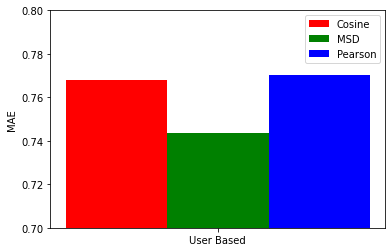

In [17]:
label = ['User Based']
value = np.arange(len(label))
width = 0.1

# setting the low and high of the graph view
low = min([graph_data['mae'][i][0] for i in graph_data['mae']])
# high = max(testing_accs)

# plt.ylim([low - 0.05, 1])
plt.ylim([0.7, 0.8])

plt.bar(value-0.1, graph_data['mae']['cosine'][0], width, color='red')
plt.bar(value, graph_data['mae']['msd'][0], width, color='green')
plt.bar(value+0.1, graph_data['mae']['pearson_baseline'][0], width, color='blue')

# adding accuracy percentage to bar plots
# for index, data in enumerate([graph_data['mae'][i][0] for i in graph_data['mae']]):
#     plt.text(x=index, y=data+0.05, s=f"{data}%", fontdict=dict(fontsize=20))

plt.xticks(value, label)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

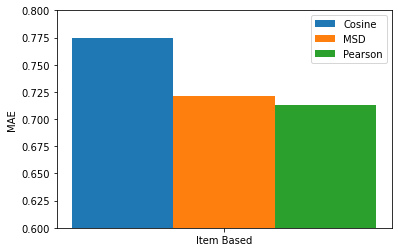

In [22]:
label = ['Item Based']
value = np.arange(len(label))
width = 0.1

plt.ylim([0.6, 0.8])

plt.bar(value-0.1, graph_data['mae']['cosine'][1], width)
plt.bar(value, graph_data['mae']['msd'][1], width)
plt.bar(value+0.1, graph_data['mae']['pearson_baseline'][1], width)

plt.xticks(value, label)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

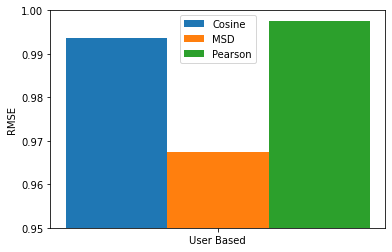

In [23]:
label = ['User Based']
value = np.arange(len(label))
width = 0.1

plt.ylim([0.95, 1])
plt.bar(value-0.1, graph_data['rmse']['cosine'][0], width)
plt.bar(value, graph_data['rmse']['msd'][0], width)
plt.bar(value+0.1, graph_data['rmse']['pearson_baseline'][0], width)

plt.xticks(value, label)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

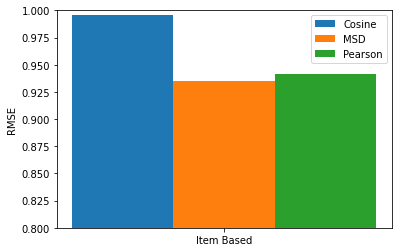

In [24]:
label = ['Item Based']
value = np.arange(len(label))
width = 0.1

plt.ylim([0.8, 1])

plt.bar(value-0.1, graph_data['rmse']['cosine'][1], width)
plt.bar(value, graph_data['rmse']['msd'][1], width)
plt.bar(value+0.1, graph_data['rmse']['pearson_baseline'][1], width)

plt.xticks(value, label)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

#### Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?

The impact of the three metrics seems to be inconsistent when comparing with MAE but somewhat consistent when comparing with RMSE

#### f. Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? 

In [5]:
user_based_rmse = []
user_based_mae = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knn_user_based = KNNBasic(sim_options={'user_based': True}, k=i)

    print('\n\n'+('='*10)+' K = ' + str(i)+' '+('='*10))
    cv_user_based = cross_validate(knn_user_based, ratings_data, measures, verbose=True, cv=5)
    start_mean = cv_user_based['test_rmse'].mean()

    user_based_rmse.append(cv_user_based['test_rmse'].mean())
    user_based_mae.append(cv_user_based['test_mae'].mean())


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2082  1.2033  1.2056  1.2148  1.2068  1.2078  0.0039  
MAE (testset)     0.9041  0.9009  0.9025  0.9099  0.8992  0.9033  0.0037  
Fit time          0.14    0.13    0.13    0.13    0.13    0.13    0.00    
Test time         0.74    0.82    0.74    0.82    0.73    0.77    0.04    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

KeyboardInterrupt: 

In [ ]:
item_based_rmse = []
item_based_mae = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    print('\n\n'+('='*10)+' K = ' + str(i)+' '+('='*10))
    knn_item_based = KNNBasic(sim_options={'user_based': False}, k=i)
    cv_item_based = cross_validate(knn_item_based, ratings_data, measures, verbose=True, cv=5)

    item_based_rmse.append(cv_item_based['test_rmse'].mean())
    item_based_mae.append(cv_item_based['test_mae'].mean())
    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3050  1.3079  1.3105  1.3068  1.2964  1.3053  0.0048  
MAE (testset)     0.9674  0.9692  0.9700  0.9728  0.9606  0.9680  0.0041  
Fit time          4.45    4.47    4.50    4.47    4.53    4.49    0.03    
Test time         4.98    5.23    5.32    5.29    5.31    5.23    0.13    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

#### Plot your results. 

In [1]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
fig.tight_layout()
plt.plot(user_based_rmse, label='user-based-rmse', color='blue')
plt.title("User-Based RMSE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()

plt.subplot(2, 1, 2)
fig.tight_layout()
plt.plot(user_based_mae, label='user-based-mae', color='red')
plt.title("User-Based MAE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("MAE")
plt.legend()

plt.show()

NameError: name 'plt' is not defined

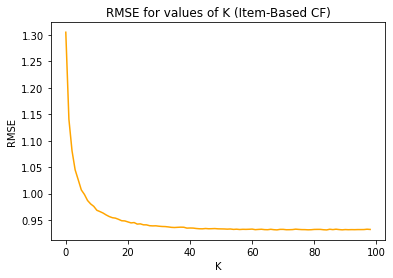

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
fig.tight_layout()
plt.plot(item_based_rmse, label='item-based-rmse', color='blue')
plt.title("Item-Based RMSE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()

plt.subplot(2, 1, 2)
fig.tight_layout()
plt.plot(item_based_mae, label='item-based-mae', color='red')
plt.title("Item-Based MAE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("MAE")
plt.legend()

plt.show()

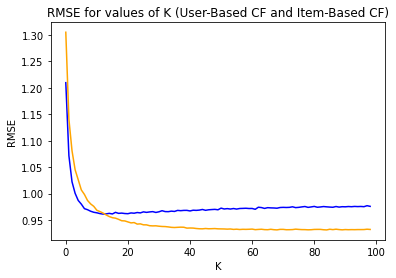

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
fig.tight_layout()
plt.plot(user_based_rmse, label='user-based-rmse', color='blue')
plt.plot(item_based_rmse, label='item-based-rmse', color='red')
plt.title("User-Based RMSE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()

plt.subplot(2, 1, 2)
fig.tight_layout()
plt.plot(item_based_mae, label='item-based-mae', color='red')
plt.plot(user_based_mae, label='user-based-mae', color='blue')
plt.title("Item-Based MAE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("MAE")
plt.legend()

plt.show()

#### g. Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE.  Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering? 

In [1]:
#min value of k for user-based 
min_user_based = user_based_results.index(min(user_based_results))
print('RMSE is the lowest for User Based when K =',min_user_based)

NameError: name 'user_based_results' is not defined

In [ ]:
#min value of k for user-based 
min_k_ib = min(item_based_results)
index_min_ib = item_based_results.index(min_k_ib)
print('Value of K with min RMSE for Item-Based',index_min_ib)

Value of K with min RMSE for Item-Based 84
